# Loan Approval Prediction

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/LoanApprovalPrediction.csv")

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df = df.drop(["Loan_ID"], axis=1)


In [36]:
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()

obj_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

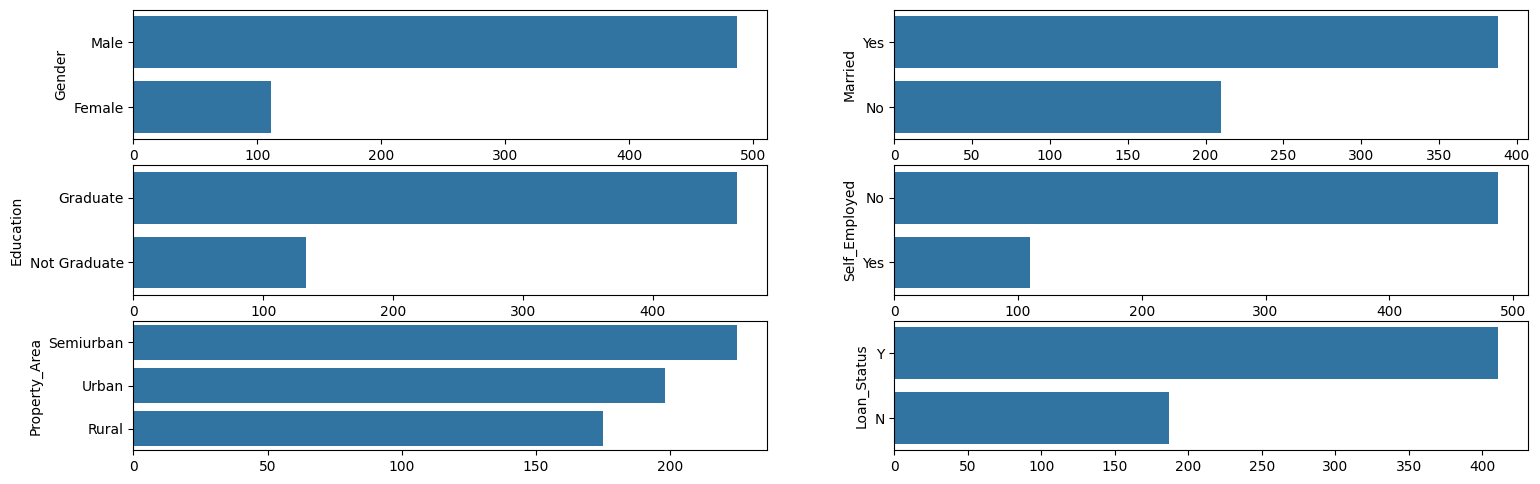

In [42]:

plt.figure(figsize=(18,36))
index=1

for col in obj_cols:
  data = df[col].value_counts()

  plt.subplot(18,2, index)
  sns.barplot(x=data.values, y=data.index)

  index+=1

In [43]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in obj_cols:
  le = LabelEncoder()

  df[col] = le.fit_transform(df[col])

  encoders[col] = le


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 56.2 KB


In [46]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


In [47]:
for col  in df.columns:
  if df[col].isnull().any():
    df[col] = df[col].fillna(df[col].median())

In [48]:
df.isnull().sum()


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [68]:
target= df.corr()["Loan_Status"].drop("Loan_Status")

target[abs(target) >= 0.05].index.tolist()

['Married', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

In [72]:
def feature_selection(target, threshhold):
  corr = df.corr()

  target_corr = corr[target].drop(target)

  selected_features = target_corr[abs(target_corr) >= threshhold].index.tolist()

  return selected_features

features = feature_selection("Loan_Status", 0.05)

5

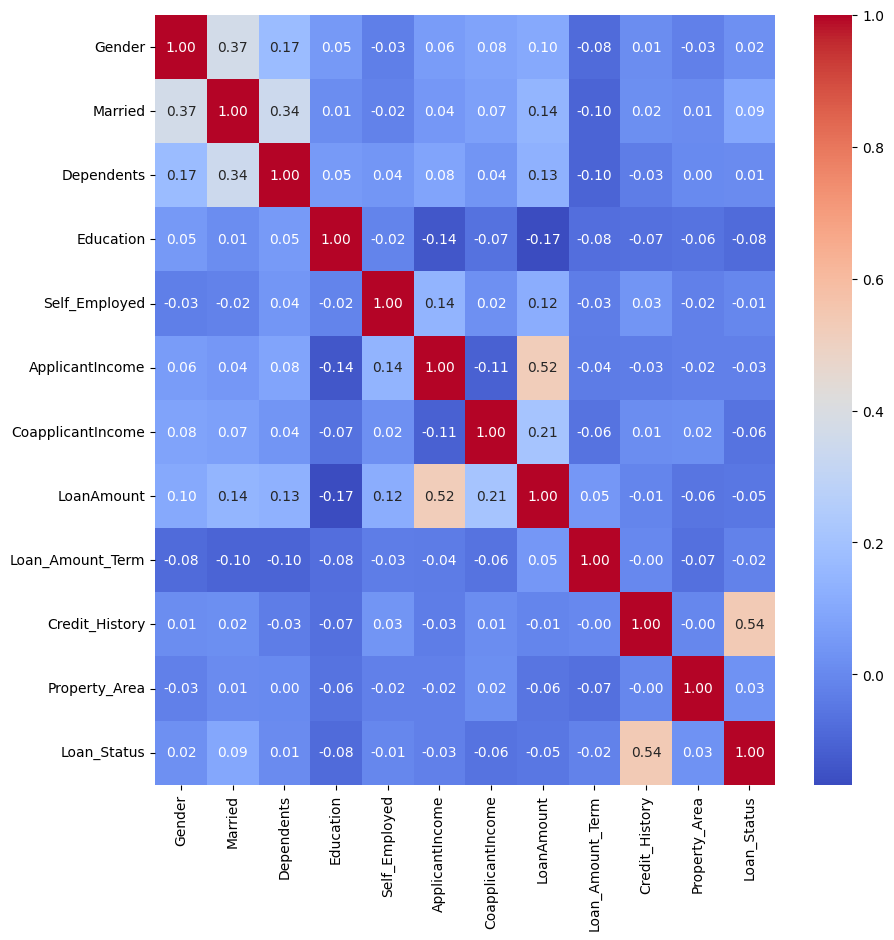

In [51]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")

plt.show()

In [73]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((448, 5), (150, 5), (448,), (150,))

In [102]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [103]:
y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7866666666666666